In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a = pd.read_csv('Dataset/Unemployment in India.csv')

In [3]:
a

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
a.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# Data Preprocessing & Cleaning

In [5]:
a.columns #Here column names are having unwanted spaces in the data, so we will fix this

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
a.columns = a.columns.str.strip() #We strip the unwanted spaces from the column names

In [7]:
a.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
a.duplicated() #Here I checked if there was any duplicate value present in the dataset or not

0      False
1      False
2      False
3      False
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Length: 768, dtype: bool

In [9]:
a = a.drop_duplicates() #Here I dropped the duplicate values from the dataset

In [10]:
a.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
749    False
750    False
751    False
752    False
753    False
Length: 741, dtype: bool

In [11]:
a.isnull() #Here I checked if there was any nnull value present in the dataset or not

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
749,False,False,False,False,False,False,False
750,False,False,False,False,False,False,False
751,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False


In [12]:
a.isnull().sum() #Total number of null value that is present in the data

Region                                     1
Date                                       1
Frequency                                  1
Estimated Unemployment Rate (%)            1
Estimated Employed                         1
Estimated Labour Participation Rate (%)    1
Area                                       1
dtype: int64

In [13]:
data = a.dropna() #Dropping the null valued row

In [14]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [15]:
#Here we converted the 'Date' datatype to avoid errors
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  
data = data.sort_values(by='Date')

C:\Users\rahul\AppData\Local\Temp\ipykernel_14232\603375718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


In [16]:
data.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

# Exploratory Data Analysis (EDA)

### ESTIMATED UNEMPLOYMENT RATE OVR TIME

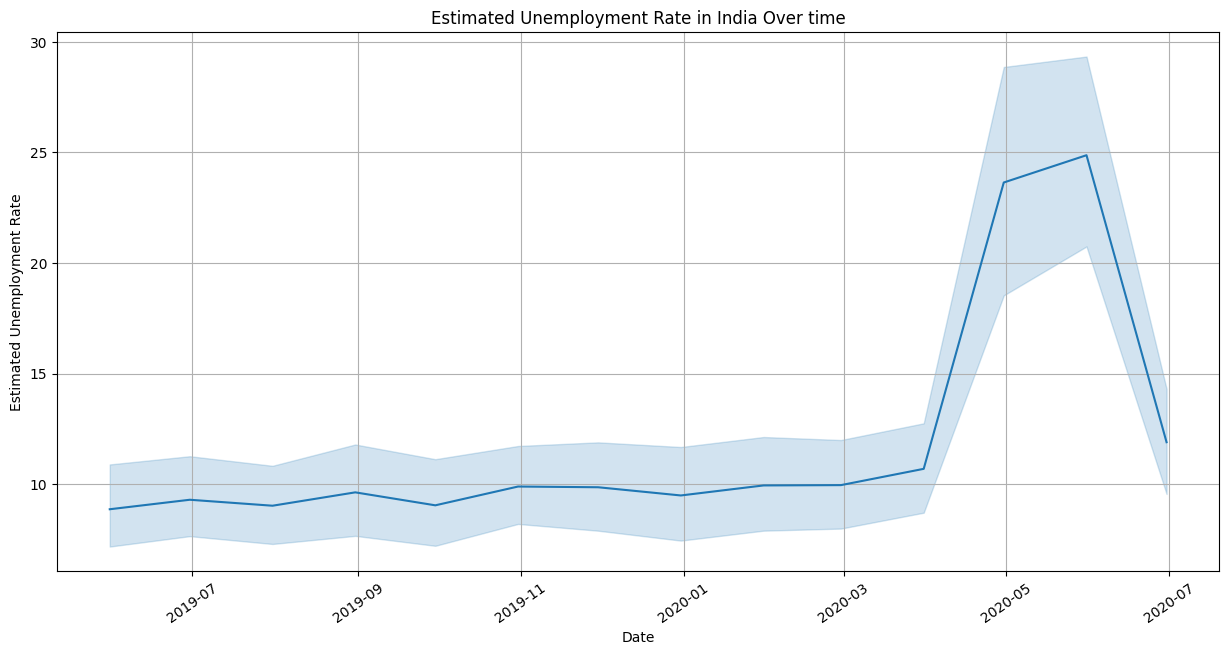

In [17]:
plt.figure(figsize=(15,7))
sns.lineplot(data = data, x = 'Date', y = 'Estimated Unemployment Rate (%)')
plt.xlabel('Date')
plt.xticks(rotation=35)
plt.ylabel('Estimated Unemployment Rate')
plt.title('Estimated Unemployment Rate in India Over time')
plt.grid(True)

#### Here we can see the clear spike on the Estimated Unemployment Rate Vs Date graph, when Covid19 occured, it suggests job losses due to the lockdown and economic slowdown.

### REGIONAL ESTIMATED UNEMPLOYMENT RATE OVER TIME

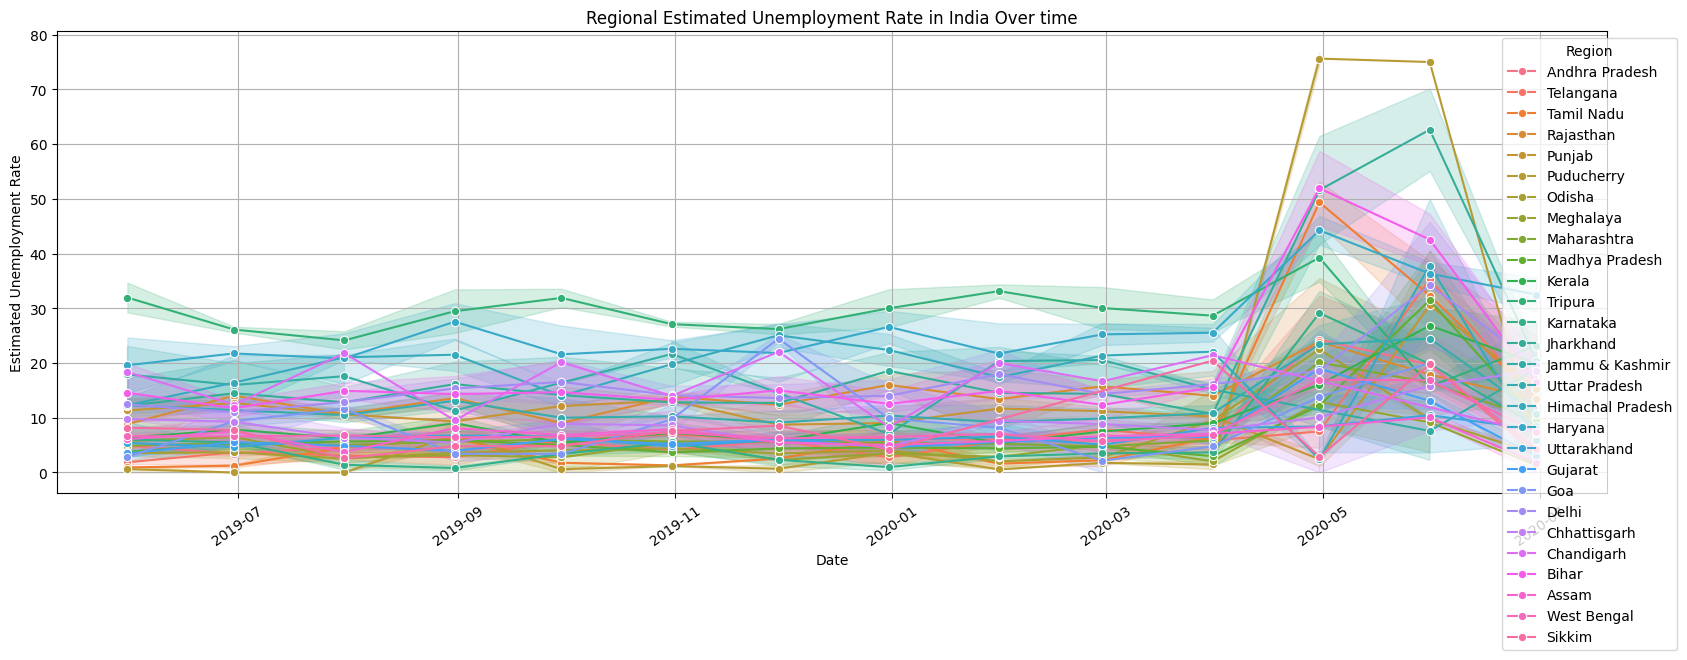

In [18]:
plt.figure(figsize=(20,6))
sns.lineplot(data  = data, x = 'Date', y = 'Estimated Unemployment Rate (%)', hue = 'Region', marker = 'o')
plt.xlabel('Date')
plt.xticks(rotation = 35)
plt.ylabel('Estimated Unemployment Rate')
plt.title('Regional Estimated Unemployment Rate in India Over time')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.grid(True)

#### Unemployment Rate Distribution Across Indian States

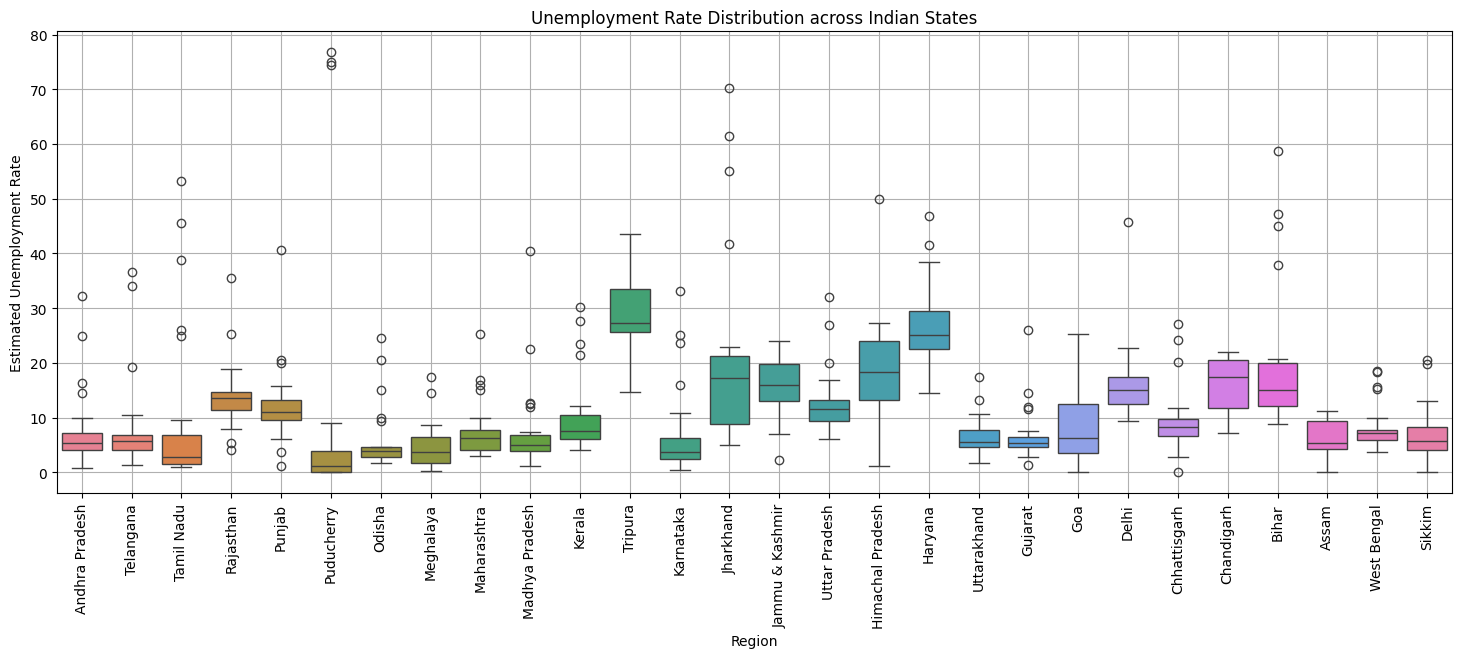

In [19]:
plt.figure(figsize=(18,6))
sns.boxplot(data = data, x = 'Region', y = 'Estimated Unemployment Rate (%)',hue = 'Region')
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('Estimated Unemployment Rate')
plt.title('Unemployment Rate Distribution across Indian States')
plt.grid(True)

#### The box plot shows the distribution of unemployment rates across different regions:
#### Wide boxes indicate high variability in unemployment rates.

In [20]:
regional_avg_unemployment = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

In [21]:
regional_avg_unemployment

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               18.918214
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               16.495357
Goa                  9.274167
Gujarat              6.663929
Haryana             26.283214
Himachal Pradesh    18.540357
Jammu & Kashmir     16.188571
Jharkhand           20.585000
Karnataka            6.676071
Kerala              10.123929
Madhya Pradesh       7.406429
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry          10.215000
Punjab              12.031071
Rajasthan           14.058214
Sikkim               7.249412
Tamil Nadu           9.284286
Telangana            7.737857
Tripura             28.350357
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Estimated Unemployment Rate (%), dtype: float64

C:\Users\rahul\AppData\Local\Temp\ipykernel_14232\1035131665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_avg_unemployment,palette="coolwarm")


Text(0.5, 1.0, 'Regional Avarage Unemployment Rate')

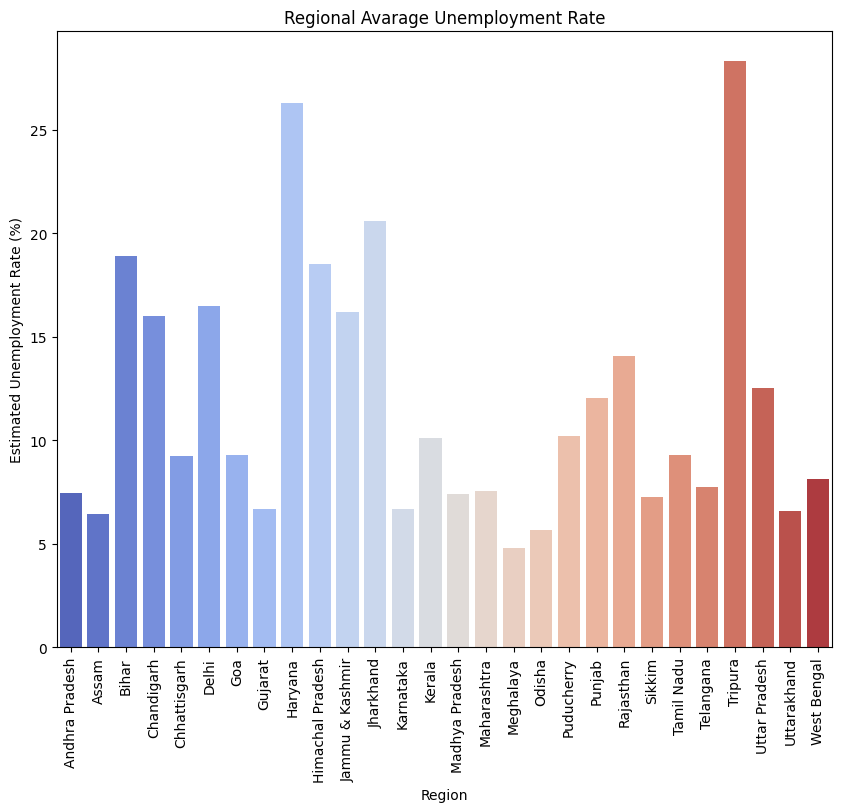

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=regional_avg_unemployment,palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Regional Avarage Unemployment Rate')

#### Here Tripura has Highest Unemployment Rate[28.350357] and Meghalaya has the lowest Unemmpoyment Rate[4.798889]

In [23]:
highest_raur = regional_avg_unemployment.nlargest()
lowest_raur = regional_avg_unemployment.nsmallest()
print(highest_raur,lowest_raur)

Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: Estimated Unemployment Rate (%), dtype: float64 Region
Meghalaya      4.798889
Odisha         5.657857
Assam          6.428077
Uttarakhand    6.582963
Gujarat        6.663929
Name: Estimated Unemployment Rate (%), dtype: float64


C:\Users\rahul\AppData\Local\Temp\ipykernel_14232\974733829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_raur,palette="rocket")


Text(0.5, 1.0, 'Regional Highest Unemployment Rate')

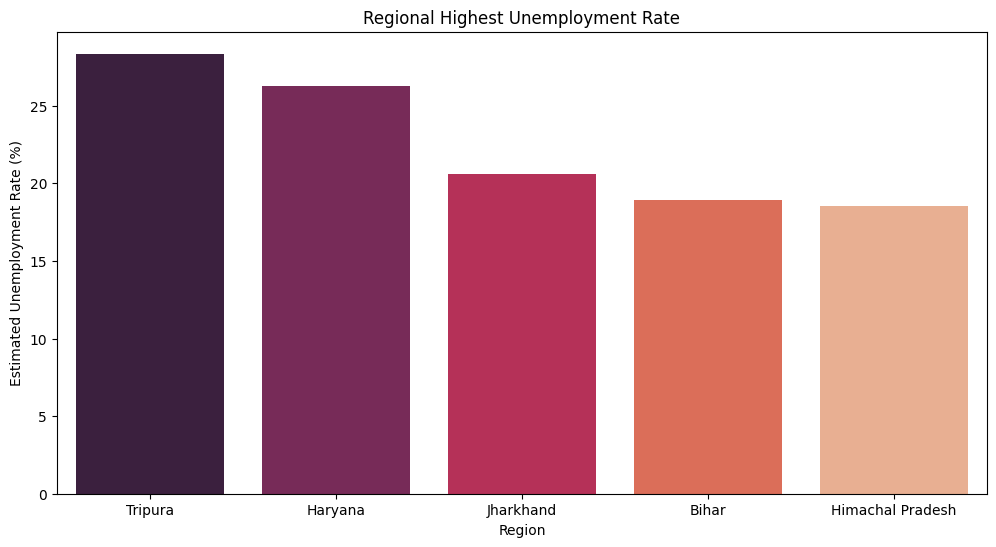

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=highest_raur,palette="rocket")

plt.title('Regional Highest Unemployment Rate')

#### Top 5 Highest Unemployment Rate States in India during COVID-19

C:\Users\rahul\AppData\Local\Temp\ipykernel_14232\4192254531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_raur,palette="coolwarm")


Text(0.5, 1.0, 'Regional Lowest Unemployment Rate')

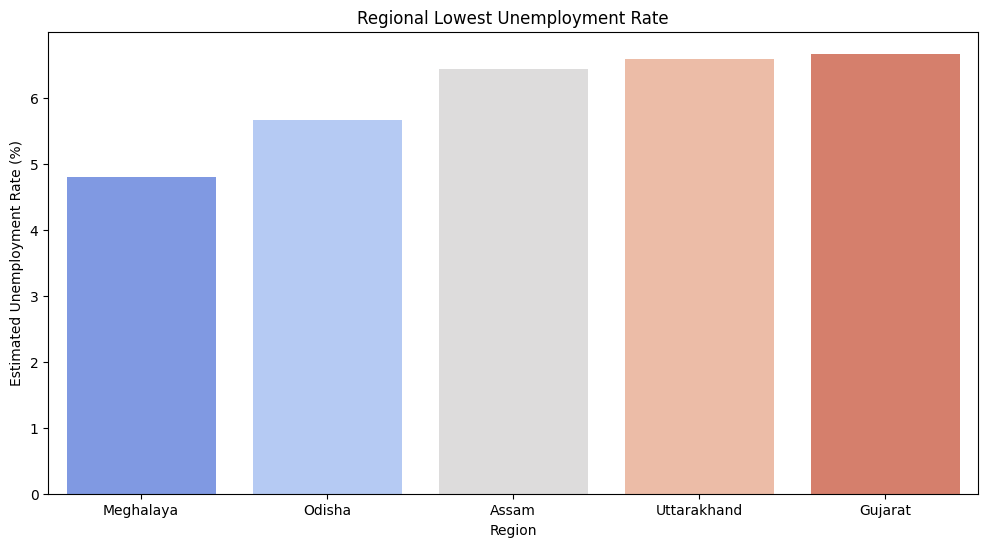

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=lowest_raur,palette="coolwarm")

plt.title('Regional Lowest Unemployment Rate')

#### Top 5 Lowest Unemployment Rate States in India during COVID-19

#### Geographical Trends (North Indian States vs. South Indian States)

In [26]:
north_states = ["Haryana", "Himachal Pradesh", "Uttarakhand", "Punjab", "Uttar Pradesh", "Delhi", "Jammu and Kashmir"]
south_states = ["Karnataka", "Kerala", "Tamil Nadu", "Andhra Pradesh", "Telangana"]
north_avg_unemployment = data[data['Region'].isin(north_states)].groupby('Date')['Estimated Unemployment Rate (%)'].mean()
south_avg_unemployment = data[data['Region'].isin(south_states)].groupby('Date')['Estimated Unemployment Rate (%)'].mean()

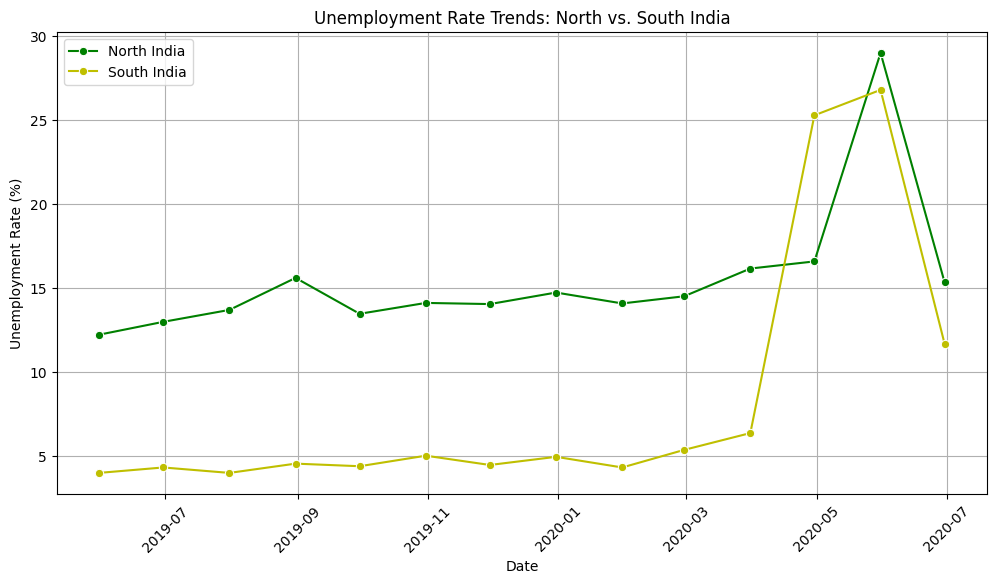

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=north_avg_unemployment.index, y=north_avg_unemployment.values, label="North India", color='g', marker='o')
sns.lineplot(x=south_avg_unemployment.index, y=south_avg_unemployment.values, label="South India", color='y', marker='o')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Trends: North vs. South India')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


#### North India(Green Line) shows higher Unemployment Rates.
#### South India(Yellow Line) shows higher Unemployment Rates.



In [28]:
cor_data = ["Estimated Unemployment Rate (%)","Estimated Employed","Estimated Labour Participation Rate (%)"]
correlation_matrix = data[cor_data]
correlation_matrix.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


<Axes: >

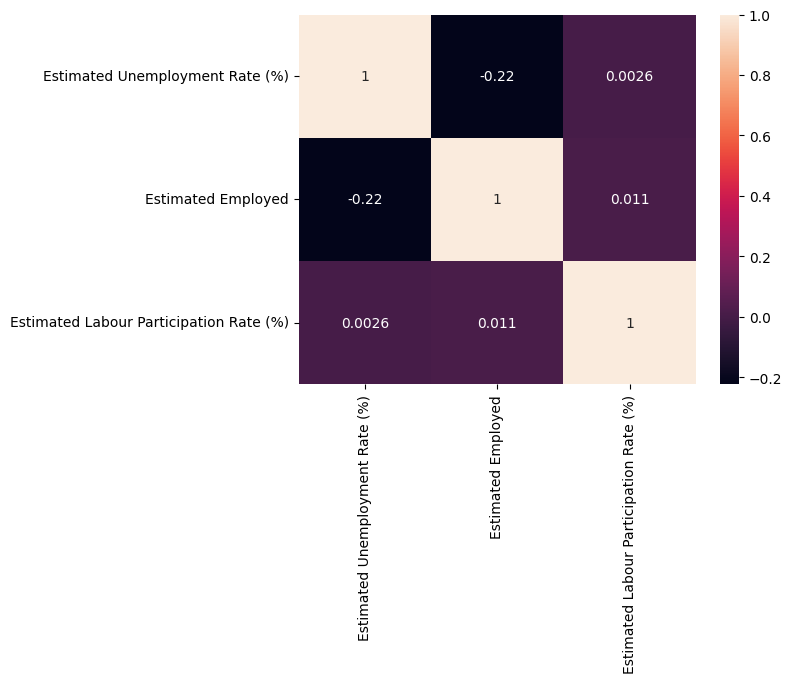

In [29]:
sns.heatmap(correlation_matrix.corr(),annot=True)

#### Here is the Correlation Matrix, here nothing holds a significant relation between them

In [30]:
data[data['Region'].isin(north_states)].groupby('Date')['Estimated Unemployment Rate (%)']

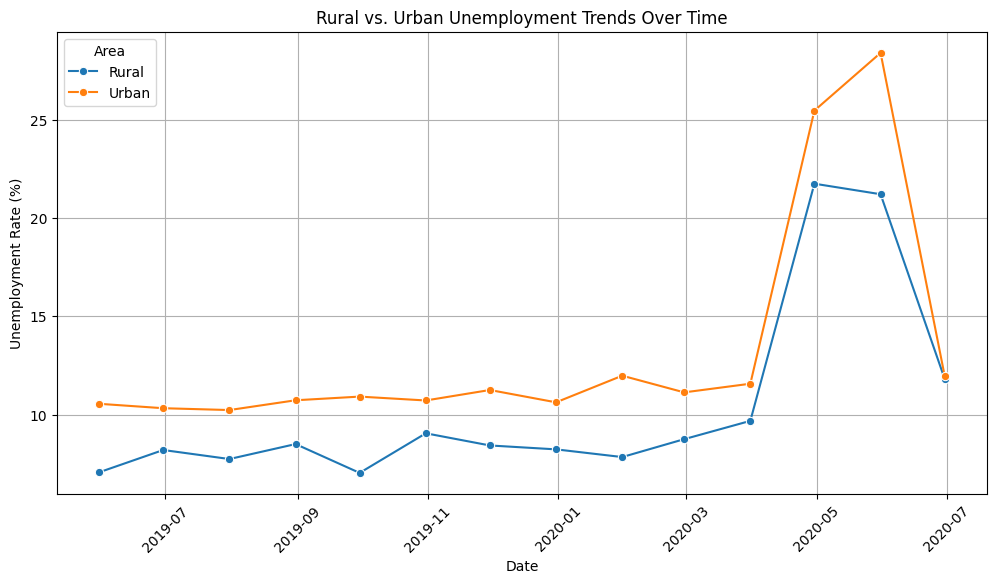

In [31]:
rural_urban_trends = data.groupby(['Date', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=rural_urban_trends, x='Date', y='Estimated Unemployment Rate (%)', hue='Area', marker='o')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Rural vs. Urban Unemployment Trends Over Time')
plt.xticks(rotation=45)
plt.legend(title='Area')
plt.grid(True)
plt.show()


#### Urban unemployment is generally higher than rural unemployment.
#### Spikes in urban areas indicate higher sensitivity to economic disruptions due to COVID-19.
#### Rural unemployment is more stable, possibly due to agricultural employment buffering job losses.

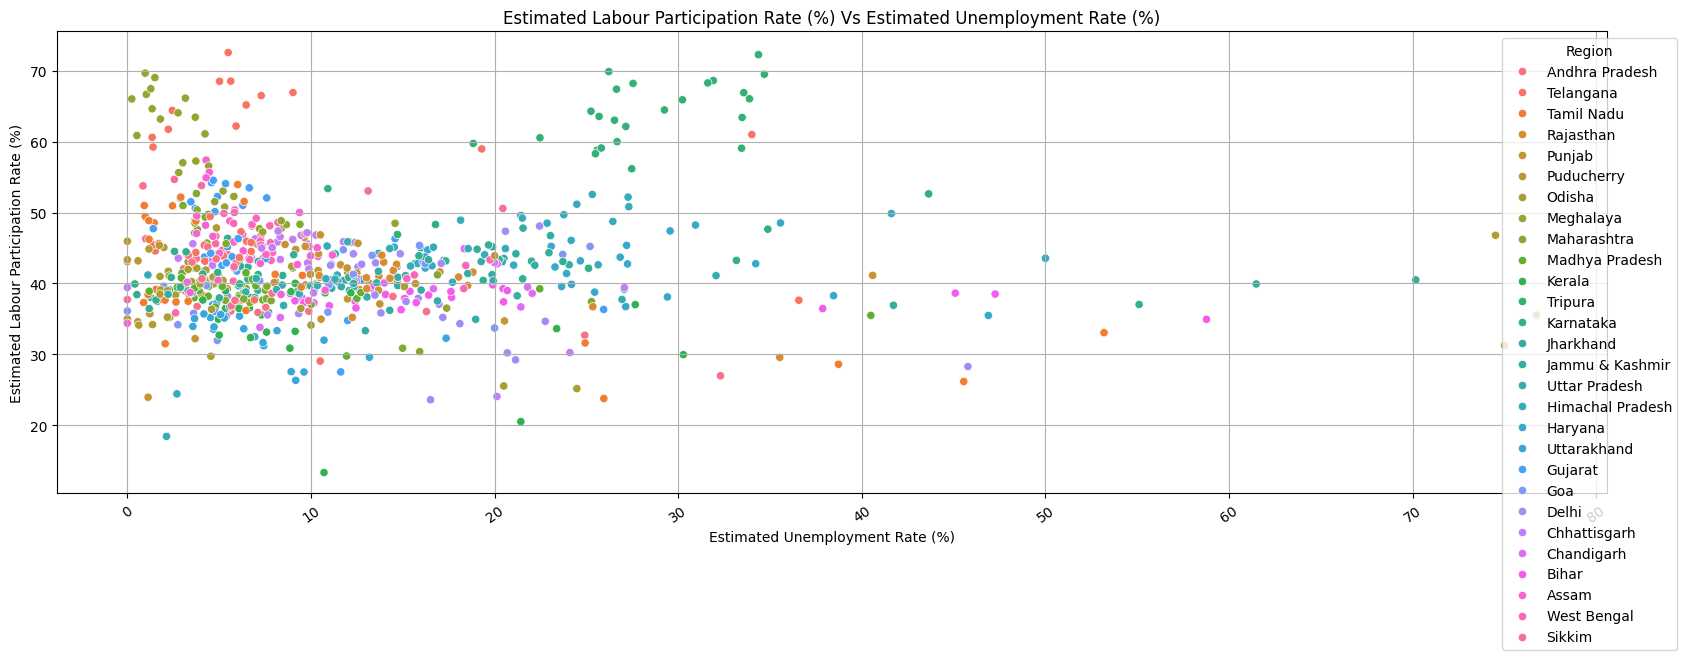

In [36]:
plt.figure(figsize=(20,6))
sns.scatterplot(data  = data, x = 'Estimated Unemployment Rate (%)', y = 'Estimated Labour Participation Rate (%)', hue = 'Region', marker = 'o')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation = 35)
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%) Vs Estimated Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.grid(True)

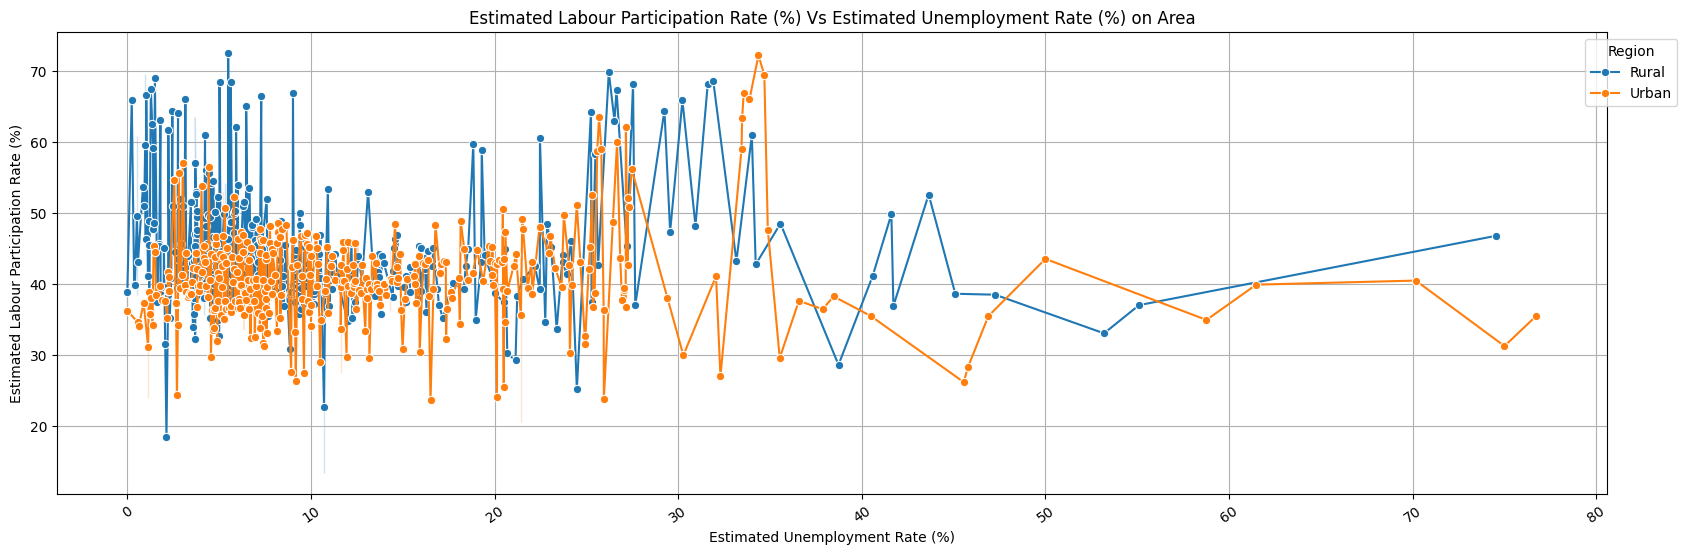

In [33]:
plt.figure(figsize=(20,6))
sns.lineplot(data  = data, x = 'Estimated Unemployment Rate (%)', y = 'Estimated Labour Participation Rate (%)', hue = 'Area', marker = 'o')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation = 35)
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%) Vs Estimated Unemployment Rate (%) on Area')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.grid(True)